## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


## Import Dataset

In [2]:
df = pd.read_csv('8_classes.csv')

In [3]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Magnitude,Radius,Covariance,Variance,Weight,label,FileName,Protocol Name,Binary Label,8 Classes Label
0,0.000000,54.00,6,64.00,0.329807,0.329807,0.0,1,0,1,...,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DDoS
1,0.000000,57.04,6,64.00,4.290556,4.290556,0.0,0,0,0,...,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DoS
2,0.000000,0.00,1,64.00,33.396799,33.396799,0.0,0,0,0,...,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,IGMP,ATTACK,DDoS
3,0.328175,76175.00,17,64.00,4642.133010,4642.133010,0.0,0,0,0,...,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,MUX,ATTACK,DoS
4,0.117320,101.73,6,65.91,6.202211,6.202211,0.0,0,1,0,...,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332060,0.000000,54.00,6,64.00,13.160665,13.160665,0.0,0,0,0,...,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DDoS
7332061,0.233475,17453.70,17,67.82,30034.276124,30034.276124,0.0,0,0,0,...,10.157898,7.413133,264.972492,0.12,141.55,DoS-UDP_Flood,part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,MUX,ATTACK,DoS
7332062,0.000000,54.00,6,64.00,0.953451,0.953451,0.0,0,0,0,...,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DDoS
7332063,0.000000,54.00,6,64.00,14.870483,14.870483,0.0,1,0,1,...,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb...,CBT,ATTACK,DDoS


In [4]:
df_tcp = pd.read_csv('tcp_layer.csv').drop(columns = 'Value')
df_tcp = df_tcp.rename(columns={'Name': 'Protocol Features', '8 Classes Label': 'Multi-Class Label'})

In [5]:
df_tcp

,Multi-Class Label,Protocol Type,Protocol Features
0,DoS,9,UDP
1,DoS,9,IPv
2,DoS,9,LLC
3,Mirai,23,ICMP
4,Mirai,23,IPv
...,...,...,...
1684,Web,5,IPv
1685,Web,5,LLC
1686,DoS,8,TCP
1687,DoS,8,IPv


## Initial Data Exploration

In [6]:
df.shape

(7332065, 51)

In [7]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'FileName', 'Protocol Name', 'Binary Label', '8 Classes Label'],
      dtype='object')

In [8]:
df = df.rename(columns={'8 Classes Label': 'Label'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332065 entries, 0 to 7332064
Data columns (total 51 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    int64  
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  int64  
 8   syn_flag_number  int64  
 9   rst_flag_number  int64  
 10  psh_flag_number  int64  
 11  ack_flag_number  int64  
 12  ece_flag_number  int64  
 13  cwr_flag_number  int64  
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             int64  
 20  HTTPS            int64  
 21  DNS              int64  
 22  Telnet           int64  
 23  SMTP             int64  
 24  SSH              int64  
 25  IRC              int64  
 26  TCP              int64  
 27  UDP         

## Check Duplicated Values

In [10]:
duplicate = df.duplicated().sum()

In [11]:
duplicate

0

## Column Selection

In [12]:
df = df.drop(columns = {'Header_Length', 'Duration',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label','FileName', 'Protocol Name', 'Binary Label', 'label'})

In [13]:
df.columns

Index(['flow_duration', 'Protocol Type', 'Rate', 'Label'], dtype='object')

## Analysis of Attack Class Distribution

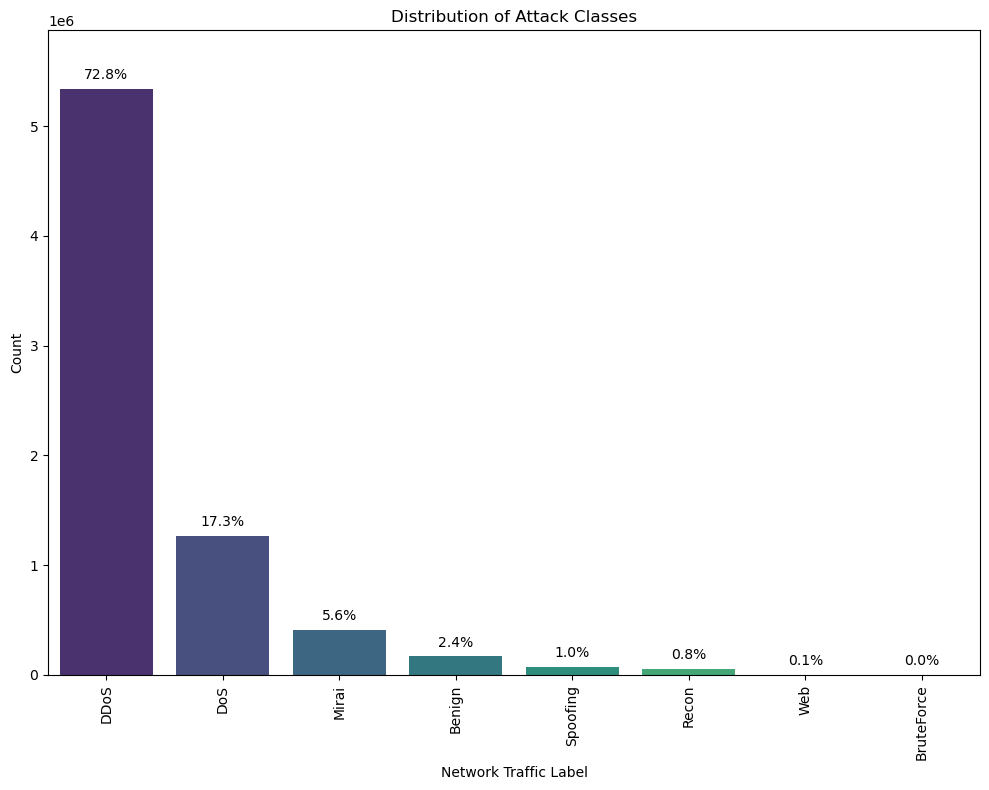

In [14]:
class_counts = df['Label'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack Classes')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations

# Add percentage labels on top of the bars
total_count = len(df['Label'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Set the vertical offset for the annotations to be 1% of the max height of the y-axis
    vertical_offset = max_height * 0.01
    ax.annotate(percentage, (x, y + vertical_offset), ha='center', va='bottom', color='black', fontsize=10)  # Adjusted text properties

plt.tight_layout();

## Characterization of Flow Duration by Attack Classes 

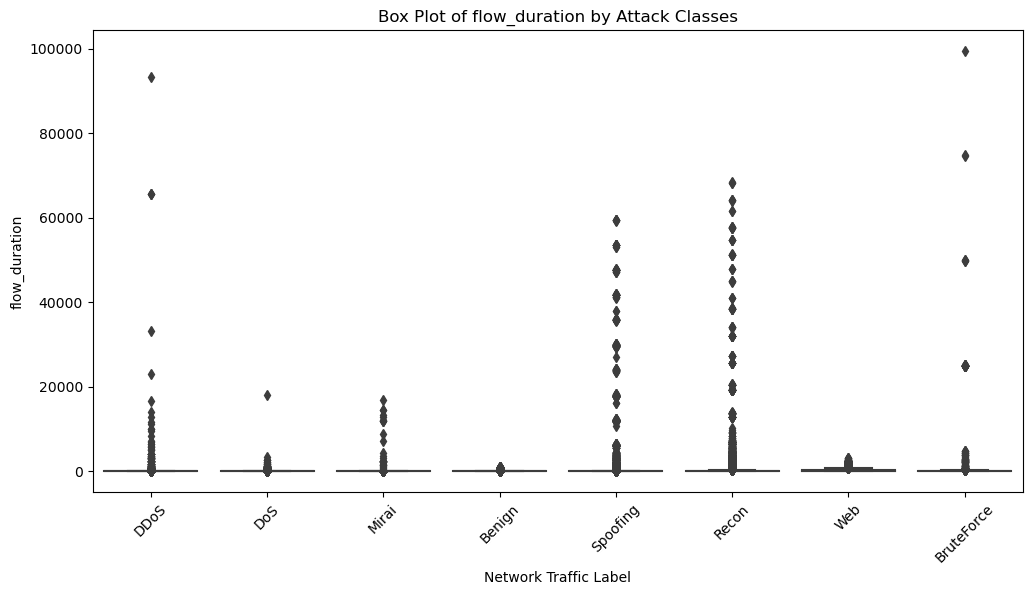

In [15]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='flow_duration', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of flow_duration by Attack Classes')
plt.xlabel('Network Traffic Label')
plt.ylabel('flow_duration');

## Analysis of Packet Transmission Rates

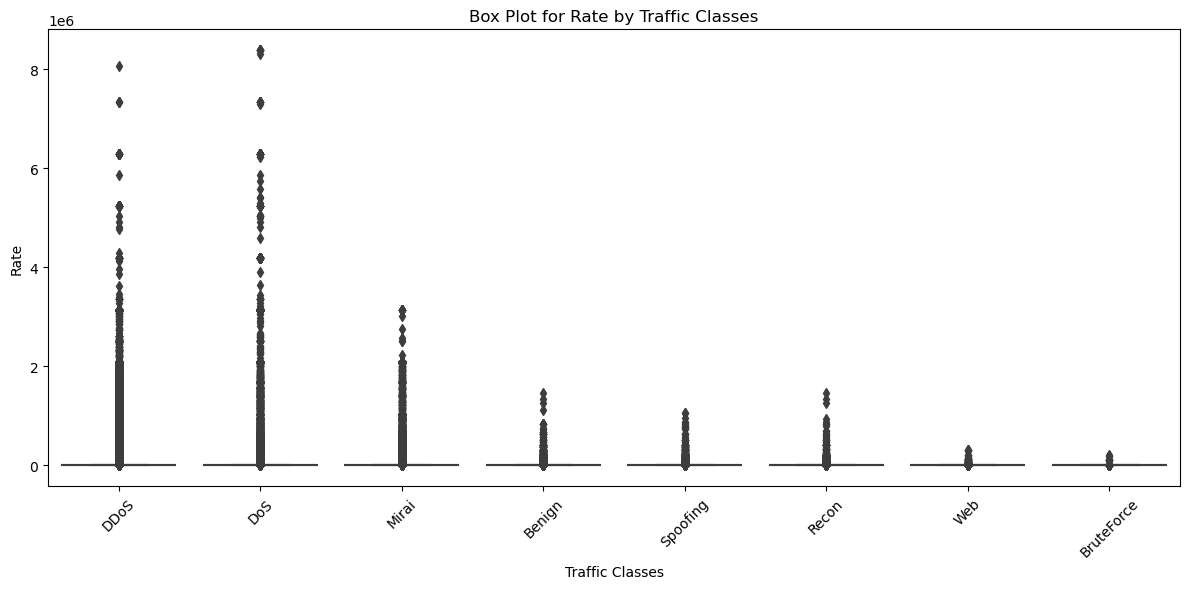

In [16]:
# Create a box plot for all labels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Label", y="Rate")  # You can specify a different palette if needed
plt.title('Box Plot for Rate by Traffic Classes')
plt.xlabel('Traffic Classes')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.tight_layout();

## Analysis of Protocol Feature

In [17]:
# Dictionary to map each protocol feature to its corresponding OSI model layer
protocol_layer_mapping = {
    'HTTP' : 'Application',
    'HTTPS' : 'Application',
    'DNS': 'Application',
    'Telnet': 'Application',
    'SMTP': 'Application',
    'SSH': 'Application',
    'IRC': 'Application',
    'DHCP': 'Application',
    'TCP': 'Transport',
    'UDP': 'Transport',
    'ICMP': 'Network',
    'IPv': 'Network',
    'ARP': 'Link',
    'LLC': 'Link'}

df_tcp['OSI Layer'] = df_tcp['Protocol Features'].map(protocol_layer_mapping)
df_tcp[['OSI Layer', 'Protocol Features']]

grouped_OSI =  df_tcp.pivot_table(index = ['OSI Layer', 'Protocol Features']).drop(columns='Protocol Type')
grouped_OSI

Empty DataFrame
Columns: []
Index: [(Application, DHCP), (Application, DNS), (Application, HTTP), (Application, HTTPS), (Application, SMTP), (Application, SSH), (Link, ARP), (Link, LLC), (Network, ICMP), (Network, IPv), (Transport, TCP), (Transport, UDP)]

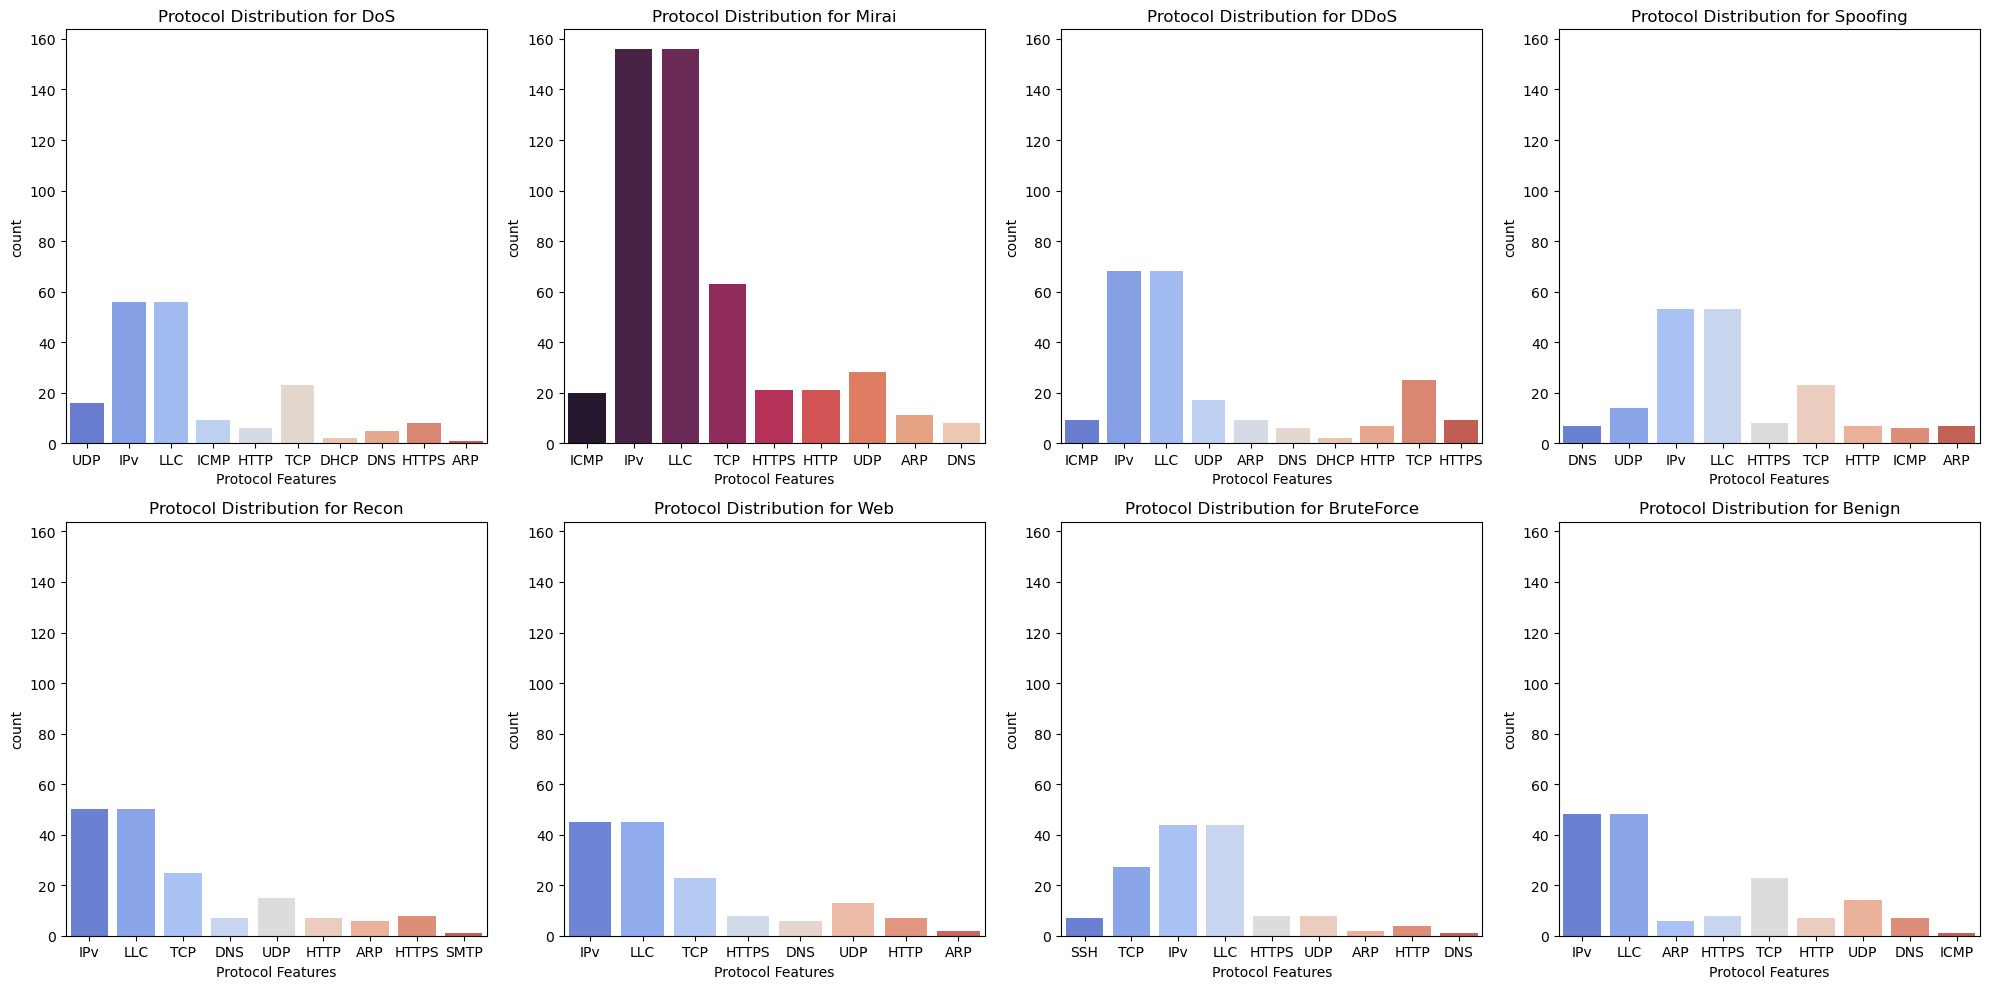

In [18]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()
# All other subplots will use the 'coolwarm' palette
palettes = ['coolwarm' for _ in range(len(axes_flat))]
palettes[1] = 'rocket'

# Track the index for the subplot
index = 0

# Iterate over each unique class label and create a subplot for each
for class_label in df_tcp['Multi-Class Label'].unique():
    # Filter the dataframe for the current class label
    df_class = df_tcp[df_tcp['Multi-Class Label'] == class_label]
    
    # Create a countplot for each unique class label
    sns.countplot(x='Protocol Features', data=df_class, ax=axes_flat[index], palette=palettes[index])
    
    # Set the title for each subplot
    axes_flat[index].set_title(f'Protocol Distribution for {class_label}')
    
    # Increment the index
    index += 1

# We may have unused subplots if the number of class labels is less than the number of subplots
# Let's remove the axes of any unused subplots
for i in range(index, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Set y-ticks for all subplots
for ax in axes_flat:
    ax.yaxis.set_tick_params(labelleft=True)

# Adjust the layout
plt.tight_layout();